<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AIDI1006-face-detection.ipynb v.2023
# Sample code 1 - using FaceAPI

import json, os, requests

subscription_key = "608b6356d9c44f67bab3128b97897ff8"
face_api_url = "https://face-ai1006.cognitiveservices.azure.com/" + '/face/v1.0/detect'
image_url = "https://i.cbc.ca/1.5807150.1605732785!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/faces.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'detectionModel': 'detection_03',
    'returnFaceId': 'true'
}
response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
print(json.dumps(response.json()))

[{"faceId": "645c1257-c6e3-413b-93b8-f517c856604f", "faceRectangle": {"top": 102, "left": 725, "width": 46, "height": 65}}, {"faceId": "100b40e3-931c-43fb-b746-d3e429c74c1f", "faceRectangle": {"top": 100, "left": 371, "width": 45, "height": 64}}, {"faceId": "151e2d97-0ad8-4686-96ca-655b184693f8", "faceRectangle": {"top": 9, "left": 636, "width": 42, "height": 61}}, {"faceId": "d52992d2-0f6b-4e9d-8868-4f35a53aa37f", "faceRectangle": {"top": 113, "left": 204, "width": 45, "height": 56}}, {"faceId": "8157b764-a3f2-4f18-b77a-47e5e72013df", "faceRectangle": {"top": 277, "left": 99, "width": 42, "height": 59}}, {"faceId": "8ff13ee6-10ea-4f71-b502-c8929b58fa83", "faceRectangle": {"top": 365, "left": 370, "width": 43, "height": 57}}, {"faceId": "8264d6e2-5c5c-43b8-988e-8b6482f76091", "faceRectangle": {"top": 189, "left": 455, "width": 42, "height": 56}}, {"faceId": "93421e34-c313-4d2d-90cf-d3240f738d4c", "faceRectangle": {"top": 371, "left": 641, "width": 43, "height": 55}}, {"faceId": "e5d5ff

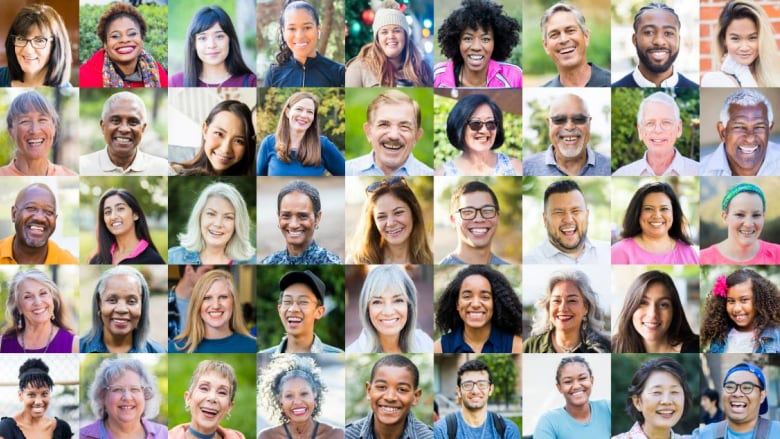

In [2]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(image_url, stream=True).raw)
img

In [3]:
!pip install --upgrade azure-cognitiveservices-vision-face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.4 MB/s eta 0:00:00


In [4]:
# AIDI1006-face-detection.ipynb v.2023
# Sample code 2 - using FaceAPI
# EXTRA CHALLENGE!!!

import asyncio
import io
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person, QualityForRecognition


# This key will serve all examples in this document.
KEY = "608b6356d9c44f67bab3128b97897ff8"

# This endpoint will be used in all examples in this quickstart.
ENDPOINT = "https://face-ai1006.cognitiveservices.azure.com/"

# Base url for the Verify and Facelist/Large Facelist operations
IMAGE_BASE_URL = 'https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/'

# Used in the Person Group Operations and Delete Person Group examples.
# You can call list_person_groups to print a list of preexisting PersonGroups.
# SOURCE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)

# Used for the Delete Person Group example.
TARGET_PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)

# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

'''
Create the PersonGroup
'''
# Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
print('Person group:', PERSON_GROUP_ID)
face_client.person_group.create(person_group_id=PERSON_GROUP_ID, name=PERSON_GROUP_ID, recognition_model='recognition_04')

# Define woman friend
woman = face_client.person_group_person.create(PERSON_GROUP_ID, name="Woman")
# Define man friend
man = face_client.person_group_person.create(PERSON_GROUP_ID, name="Man")
# Define child friend
child = face_client.person_group_person.create(PERSON_GROUP_ID, name="Child")

'''
Detect faces and register them to each person
'''
# Find all jpeg images of friends in working directory (TBD pull from web instead)
woman_images = ["https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Mom1.jpg", "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Mom2.jpg"]
man_images = ["https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Dad1.jpg", "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Dad2.jpg"]
child_images = ["https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Son1.jpg", "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/Family1-Son2.jpg"]

# Add to woman person
for image in woman_images:
    # Check if the image is of sufficent quality for recognition.
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=image, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            break
        face_client.person_group_person.add_face_from_url(PERSON_GROUP_ID, woman.person_id, image)
        print("face {} added to person {}".format(face.face_id, woman.person_id))

    if not sufficientQuality: continue

# Add to man person
for image in man_images:
    # Check if the image is of sufficent quality for recognition.
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=image, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            break
        face_client.person_group_person.add_face_from_url(PERSON_GROUP_ID, man.person_id, image)
        print("face {} added to person {}".format(face.face_id, man.person_id))

    if not sufficientQuality: continue

# Add to child person
for image in child_images:
    # Check if the image is of sufficent quality for recognition.
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=image, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            print("{} has insufficient quality".format(face))
            break
        face_client.person_group_person.add_face_from_url(PERSON_GROUP_ID, child.person_id, image)
        print("face {} added to person {}".format(face.face_id, child.person_id))
    if not sufficientQuality: continue


'''
Train PersonGroup
'''
# Train the person group
print("pg resource is {}".format(PERSON_GROUP_ID))
rawresponse = face_client.person_group.train(PERSON_GROUP_ID, raw= True)
print(rawresponse)

while (True):
    training_status = face_client.person_group.get_training_status(PERSON_GROUP_ID)
    print("Training status: {}.".format(training_status.status))
    print()
    if (training_status.status is TrainingStatusType.succeeded):
        break
    elif (training_status.status is TrainingStatusType.failed):
        face_client.person_group.delete(person_group_id=PERSON_GROUP_ID)
        sys.exit('Training the person group has failed.')
    time.sleep(5)

'''
Identify a face against a defined PersonGroup
'''
# Group image for testing against
test_image = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/identification1.jpg"

print('Pausing for 10 seconds to avoid triggering rate limit on free account...')
time.sleep (10)

# Detect faces
face_ids = []
# We use detection model 3 to get better performance, recognition model 4 to support quality for recognition attribute.
faces = face_client.face.detect_with_url(test_image, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
for face in faces:
    # Only take the face if it is of sufficient quality.
    if face.face_attributes.quality_for_recognition == QualityForRecognition.high or face.face_attributes.quality_for_recognition == QualityForRecognition.medium:
        face_ids.append(face.face_id)

# Identify faces
results = face_client.face.identify(face_ids, PERSON_GROUP_ID)
print('Identifying faces in image')
if not results:
    print('No person identified in the person group')
for identifiedFace in results:
    if len(identifiedFace.candidates) > 0:
        print('Person is identified for face ID {} in image, with a confidence of {}.'.format(identifiedFace.face_id, identifiedFace.candidates[0].confidence)) # Get topmost confidence score

        # Verify faces
        verify_result = face_client.face.verify_face_to_person(identifiedFace.face_id, identifiedFace.candidates[0].person_id, PERSON_GROUP_ID)
        print('verification result: {}. confidence: {}'.format(verify_result.is_identical, verify_result.confidence))
    else:
        print('No person identified for face ID {} in image.'.format(identifiedFace.face_id))


print()
print('End of quickstart.')

Person group: 5cf233b9-fd87-4e81-8c7a-837e59af4828
face cd4a6239-d9ba-4a29-849e-81507d1a7e24 added to person 8b993aef-8e5d-48bd-949e-fee7211b7f3a
face be5cc92a-b66a-43d0-918b-94cee7801fb1 added to person 8b993aef-8e5d-48bd-949e-fee7211b7f3a
face 618c3e39-655a-42ba-bbcf-bacdf554255c added to person 694c48f1-85c7-4c0f-9462-cdfcaade3aed
face cb5bea1e-33a8-4150-93cd-9c2746aec763 added to person 694c48f1-85c7-4c0f-9462-cdfcaade3aed
face a9e98156-841e-4862-a7f3-a15d8953d930 added to person 7c99f6a8-276d-40f9-9d10-ed09bd442a04
face 23b02eca-6d5d-44ac-9b58-43eff4f1bd91 added to person 7c99f6a8-276d-40f9-9d10-ed09bd442a04
pg resource is 5cf233b9-fd87-4e81-8c7a-837e59af4828
Training status: succeeded.

Pausing for 10 seconds to avoid triggering rate limit on free account...
Identifying faces in image
Person is identified for face ID 3e3bafd3-bc8f-408b-9b0c-f8abcfe97d49 in image, with a confidence of 0.96725.
verification result: True. confidence: 0.96725
Person is identified for face ID b0ac7d8b